In [23]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = [12.0, 6.0]

import okama as ok

pd.options.display.float_format = "{:,.5f}".format
np.set_printoptions(precision=5)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
ok.__version__

'1.4.4'

## DCF

In [25]:
assets = ["MCFTR.INDX", "GC.COMM", "RGBITR.INDX", "RUCBTRNS.INDX"]
assets1 = ["MCFTR.INDX", "GC.COMM"]
assets2 = ["SPY.US", "AGG.US", "GC.COMM"]

In [26]:
assets2

['SPY.US', 'AGG.US', 'GC.COMM']

In [27]:
weights = [0.30, 0.55, 0.15]

pf = ok.Portfolio(
    assets2,
    ccy="USD",
    weights=weights,
    inflation=True,
    # symbol="retirement_pf.PF",
    rebalancing_strategy=ok.Rebalance(period="year"),
)
print(pf)

symbol                               portfolio_5547.PF
assets                       [SPY.US, AGG.US, GC.COMM]
weights                              [0.3, 0.55, 0.15]
rebalancing_period                                year
rebalancing_abs_deviation                         None
rebalancing_rel_deviation                         None
currency                                           USD
inflation                                     USD.INFL
first_date                                     2003-10
last_date                                      2025-06
period_length                       21 years, 9 months
dtype: object


### Indexation Strategy

In [35]:
ind = ok.IndexationStrategy(pf)
ind.initial_investment = 50_000
ind.amount = 100
ind.frequency = "month"

In [36]:
print(ind)

Portfolio symbol                portfolio_5547.PF
Cash flow initial investment                50000
Cash flow frequency                         month
Cash flow strategy                   fixed_amount
Cash flow amount                              100
Cash flow indexation                      0.02585
dtype: object


In [30]:
ind.parent.first_date

Timestamp('2003-10-01 00:00:00')

In [31]:
ind.parent.last_date

Timestamp('2025-06-01 00:00:00')

In [32]:
ind.amount

100

In [37]:
ind.time_series_dic

AttributeError: 'IndexationStrategy' object has no attribute 'time_series_dic'

In [33]:
ind.indexation

0.02584540772399535

In [34]:
ind.periods_per_year

12

In [12]:
pf.dcf.cashflow_parameters = ind

In [13]:
pf.dcf.use_discounted_values = False

In [14]:
print(pf.dcf.cashflow_parameters)

Portfolio symbol                portfolio_2864.PF
Cash flow initial investment                50000
Cash flow frequency                         month
Cash flow strategy                   fixed_amount
Cash flow amount                              100
Cash flow indexation                      0.02585
dtype: object


In [15]:
pf.dcf.set_mc_parameters(distribution="norm", period=10, number=100)  # Normal distribution (or Gaussian distribution)

In [76]:
pf.dcf.discount_rate = 0.05

In [82]:
pf.dcf.monte_carlo_wealth_fv.iloc[-1, :]

0    170,719.61028
1    141,593.77819
2    134,723.39262
3    122,297.37464
4    116,157.07966
          ...     
95   110,142.31970
96   141,853.22607
97   110,374.94868
98   110,494.64492
99   137,187.52097
Name: 2034-11, Length: 100, dtype: float64

In [83]:
pf.dcf.monte_carlo_wealth_pv.iloc[-1, :]

0    104,086.18908
1     86,328.43494
2     82,139.62353
3     74,563.59372
4     70,819.91188
          ...     
95    67,152.76760
96    86,486.61795
97    67,294.59936
98    67,367.57707
99    83,641.98010
Name: 2034-11, Length: 100, dtype: float64

In [15]:
pf.dcf.survival_date_hist(threshold=0)

Timestamp('2017-01-31 00:00:00')

In [22]:
pf.dcf.survival_period_hist()

13.3

<Axes: >

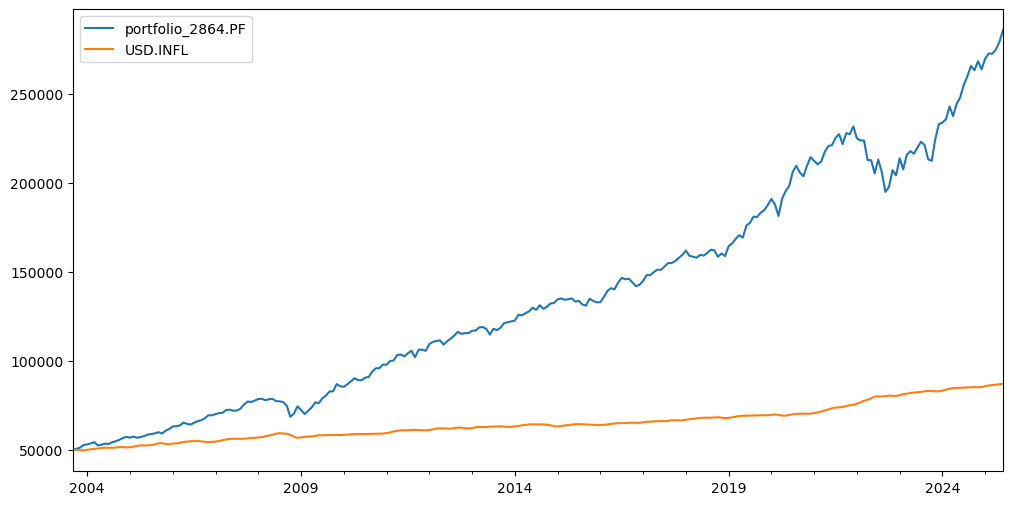

In [16]:
pf.dcf.wealth_index.plot()

### Fixed Percentage

In [9]:
# Fixed Percentage strategy
pc = ok.PercentageStrategy(pf)
pc.initial_investment = 10_000
pc.frequency = "year"
pc.percentage = -0.12
pc

Portfolio symbol                retirement_pf.PF
Cash flow initial investment               10000
Cash flow frequency                         year
Cash flow strategy              fixed_percentage
Cash flow percentage                    -0.12000
dtype: object

In [11]:
# Assign a strategy
pf.dcf.cashflow_parameters = pc
# pf.dcf.discount_rate = 0.10
# pf.dcf.use_discounted_values = False

In [13]:
print(pf.dcf)

Portfolio symbol            retirement_pf.PF
Monte Carlo distribution                norm
Monte Carlo period                        25
Cash flow strategy          fixed_percentage
use_discounted_values                  False
discount_rate                        0.02574
dtype: object


In [17]:
pf.dcf.set_mc_parameters(distribution="t", period=25, number=100)

In [22]:
pf.dcf.monte_carlo_survival_period()

0    25.00000
1    25.00000
2    25.00000
3    25.00000
4    25.00000
       ...   
95   25.00000
96   25.00000
97   25.00000
98   25.00000
99   25.00000
Length: 100, dtype: float64

### TimeSeries strategy

In [29]:
d = {
    "2025-02": 1_000,
    "2029-03": -2_000,
}

d1 = {
    "2018-02": 2_000,
    "2024-03": -4_000,
}

ts = ok.TimeSeriesStrategy(portf)
ts.initial_investment = 1_000
ts.time_series_dic = d1

ts

Portfolio symbol                portfolio_7702.PF
Cash flow initial investment                 1000
Cash flow strategy                    time_series
dtype: object

In [ ]:
# Assign a strategy
pf.dcf.cashflow_parameters = ts

In [23]:
pf.dcf

Portfolio symbol            portfolio_2953.PF
Monte carlo distribution                 norm
Monte carlo period                         25
Cash flow strategy           fixed_percentage
use_discounted_values                   False
dtype: object

In [8]:
# Set Monte Carlo
pf.dcf.set_mc_parameters(distribution="t", period=10, number=100)

In [14]:
pf.dcf.mc.period = 10

In [9]:
pf.dcf.mc.period

14

In [22]:
pf.dcf.cash_flow_parameters

AttributeError: 'PortfolioDCF' object has no attribute 'cash_flow_parameters'

In [20]:
pf.dcf.initial_investment_fv

<Axes: xlabel='date'>

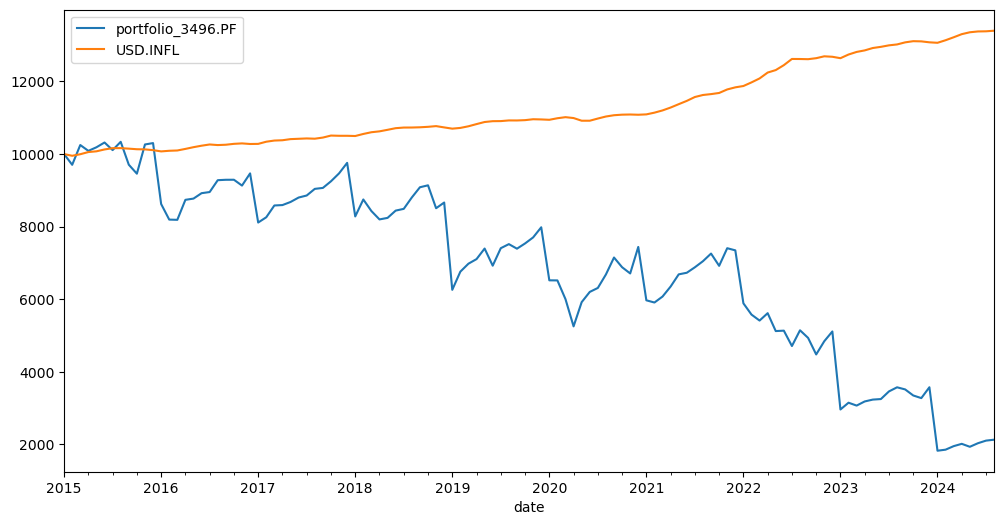

In [96]:
pf.dcf.wealth_index.plot()

In [9]:
df = pf.dcf.monte_carlo_wealth_pv

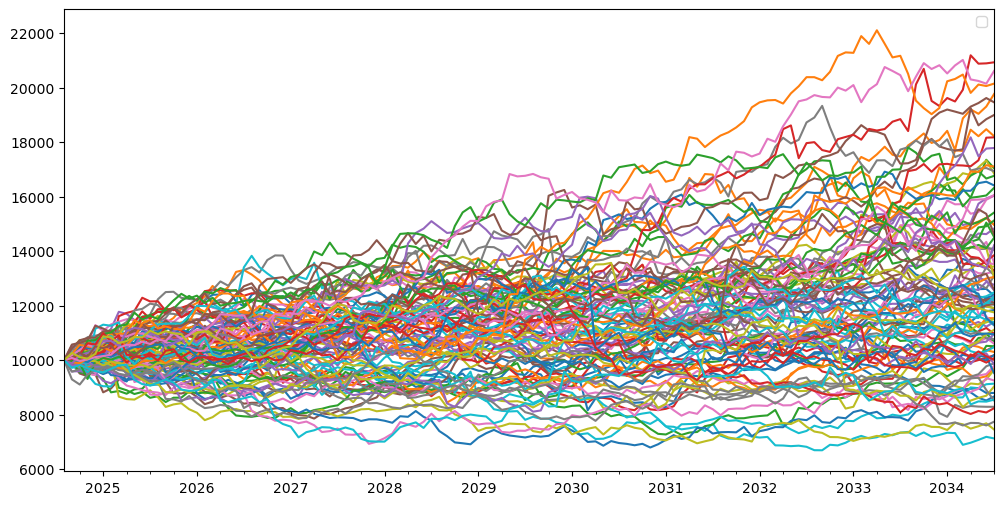

In [11]:
df.plot()
plt.legend("")

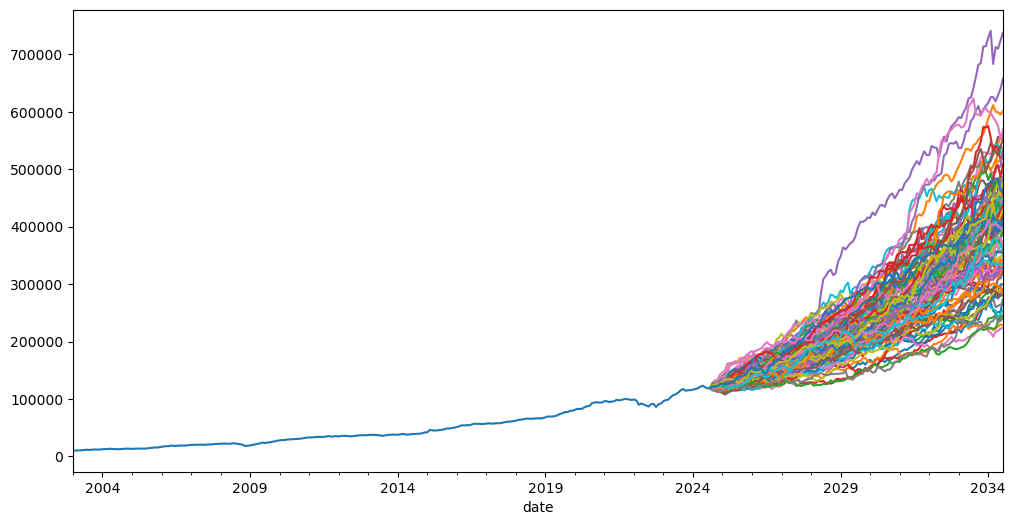

In [13]:
pf.dcf.plot_forecast_monte_carlo(backtest=True)

### find_the_largest_withdrawals_size

In [9]:
assets = ["RGBITR.INDX", "RUCBTRNS.INDX", "MCFTR.INDX", "GC.COMM"]
weights = [0.16, 0.40, 0.25, 0.19]
pf = ok.Portfolio(assets, weights=weights, ccy="RUB", rebalancing_strategy=ok.Rebalance(period="year"), inflation=False)
pf.dcf.discount_rate = 0.09
print(pf)

symbol                                                       portfolio_6436.PF
assets                       [RGBITR.INDX, RUCBTRNS.INDX, MCFTR.INDX, GC.COMM]
weights                                                [0.16, 0.4, 0.25, 0.19]
rebalancing_period                                                        year
rebalancing_abs_deviation                                                 None
rebalancing_rel_deviation                                                 None
currency                                                                   RUB
inflation                                                                 None
first_date                                                             2003-01
last_date                                                              2025-06
period_length                                               22 years, 6 months
dtype: object


In [10]:
ind = ok.IndexationStrategy(pf)
ind.initial_investment = 2_000_000 * 90
ind.amount = -4000 * 90
ind.frequency = "month"
ind.indexation = 0.09

pf.dcf.cashflow_parameters = ind
print(ind)

Portfolio symbol                portfolio_6436.PF
Cash flow initial investment            180000000
Cash flow frequency                         month
Cash flow strategy                   fixed_amount
Cash flow amount                          -360000
Cash flow indexation                      0.09000
dtype: object


In [11]:
ind.amount * 12 / ind.initial_investment * 100

-2.4

In [12]:
pf.dcf.mc.period = 50
pf.dcf.mc.number = 100
pf.dcf.mc.distribution = "norm"

In [13]:
pf.dcf.monte_carlo_survival_period().describe()

count   100.00000
mean     48.90300
std       3.62024
min      29.40000
25%      50.00000
50%      50.00000
75%      50.00000
max      50.00000
dtype: float64

In [8]:
mc_wealth_pv = pf.dcf.monte_carlo_wealth_pv

In [9]:
mc50years_wealth_pv = mc_wealth_pv.iloc[-1, :]
mc50years_wealth_pv.describe([0.05, 0.20, 0.30, 0.50])

count              90.00000
mean      400,707,166.39629
std       331,212,582.94797
min         8,107,953.18626
5%         39,702,834.57472
20%       143,359,085.40553
30%       200,303,716.07043
50%       308,283,047.77550
max     1,797,835,507.07551
Name: 2075-02, dtype: float64

In [14]:
pf.dcf.find_the_largest_withdrawals_size(
    goal="maintain_balance_pv",
    percentile=20,
    tolerance_rel=0.10,
)

wealth_at_quantile=0.00, main_parameter=-15000000.000
error_rel=1.000, gradient=0.000
decreasing withdrawal
wealth_at_quantile=0.00, main_parameter=-7500000.000
error_rel=1.000, gradient=0.000
decreasing withdrawal
wealth_at_quantile=0.00, main_parameter=-3750000.000
error_rel=1.000, gradient=0.000
decreasing withdrawal
wealth_at_quantile=0.00, main_parameter=-1875000.000
error_rel=1.000, gradient=0.000
decreasing withdrawal
wealth_at_quantile=158558931.03, main_parameter=-937500.000
error_rel=0.119, gradient=-0.881
decreasing withdrawal
wealth_at_quantile=74328629.23, main_parameter=-468750.000
error_rel=0.587, gradient=0.468
decreasing withdrawal
wealth_at_quantile=203040683.89, main_parameter=-234375.000
error_rel=0.128, gradient=-0.459
increasing withdrawal
wealth_at_quantile=104638589.01, main_parameter=-351562.500
error_rel=0.419, gradient=0.291
decreasing withdrawal
wealth_at_quantile=183759035.91, main_parameter=-292968.750
error_rel=0.021, gradient=-0.398
solution found: -2929

success                    True
withdrawal_abs   -292,968.75000
withdrawal_rel          0.01953
error_rel               0.02088
attempts                      9
dtype: object

#### Fixed Percentage

In [15]:
# Fixed Percentage strategy
pc = ok.PercentageStrategy(pf)
pc.initial_investment = 10_000
pc.frequency = "year"
pc.percentage = -0.12
print(pc)

Portfolio symbol                portfolio_6436.PF
Cash flow initial investment                10000
Cash flow frequency                          year
Cash flow strategy               fixed_percentage
Cash flow percentage                     -0.12000
dtype: object


In [16]:
pf.dcf.cashflow_parameters = pc

In [17]:
pf.dcf.mc.period = 50
pf.dcf.mc.number = 100
pf.dcf.mc.distribution = "norm"

In [18]:
sol = pf.dcf.find_the_largest_withdrawals_size(
    goal="maintain_balance_pv", percentile=20, tolerance_rel=0.10, threshold=0.05
)
sol

wealth_at_quantile=0.00, main_parameter=-1.000
error_rel=1.000, gradient=0.000
decreasing withdrawal
wealth_at_quantile=0.00, main_parameter=-0.500
error_rel=1.000, gradient=-0.000
decreasing withdrawal
wealth_at_quantile=0.06, main_parameter=-0.250
error_rel=1.000, gradient=-0.000
decreasing withdrawal
wealth_at_quantile=60.09, main_parameter=-0.125
error_rel=0.994, gradient=-0.006
decreasing withdrawal
wealth_at_quantile=1365.34, main_parameter=-0.062
error_rel=0.863, gradient=-0.131
decreasing withdrawal
wealth_at_quantile=5971.99, main_parameter=-0.031
error_rel=0.403, gradient=-0.461
decreasing withdrawal
wealth_at_quantile=11971.37, main_parameter=-0.016
error_rel=0.197, gradient=-0.206
increasing withdrawal
wealth_at_quantile=6993.80, main_parameter=-0.023
error_rel=0.301, gradient=0.103
decreasing withdrawal
wealth_at_quantile=9759.33, main_parameter=-0.020
error_rel=0.024, gradient=-0.277
solution found: -195.31 or 1.95% after 9 steps.


success                True
withdrawal_abs   -195.31250
withdrawal_rel      0.01953
error_rel           0.02407
attempts                  9
dtype: object

In [19]:
print(sol)

success                True
withdrawal_abs   -195.31250
withdrawal_rel      0.01953
error_rel           0.02407
attempts                  9
dtype: object


In [ ]:
sol.solutions